### 32,1000x100

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(Domain_data['label'].nunique(),name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            2550      
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=100,
          validation_data=(X_test, y_test))
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/100
1622/1622 [==============================] - 26s 11ms/step - loss: 2.2454 - acc: 0.3849 - val_loss: 1.0233 - val_acc: 0.7726
Epoch 2/100
1622/1622 [==============================] - 15s 9ms/step - loss: 1.5196 - acc: 0.5532 - val_loss: 0.8076 - val_acc: 0.7955
Epoch 3/100
1622/1622 [==============================] - 15s 9ms/step - loss: 1.2868 - acc: 0.6124 - val_loss: 0.6917 - val_acc: 0.8400
Epoch 4/100
1622/1622 [==============================] - 16s 10ms/step - loss: 1.1312 - acc: 0.6581 - val_loss: 0.5015 - val_acc: 0.8741
Epoch 5/100
1622/1622 [==============================] - 15s 9ms/step - loss: 1.0237 - acc: 0.6921 - val_loss: 0.4314 - val_acc: 0.8893
Epoch 6/100
1622/1622 [==============================] - 15s 9ms/step - loss: 0.9404 - acc: 0.7184 - val_loss: 0.3784 - val_acc: 0.9024
Epoch 7/100
1622/1622 [==============================] - 16s 10ms/step - loss: 0.8794 - acc: 0.7393 - val_loss: 0.4349 - val_acc: 0.8897
Epoch 8/100
1622/1622 [======================

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12979/12979 [==============================] - 59s 5ms/step - loss: 0.2129 - acc: 0.9417
LSTM multiclass Testing finished in 58.95770025253296 milisecond!!

Accuracy on test set: [0.21289664506912231, 0.9417085647583008]
Test loss: 0.21289664506912231
Test accuracy: 0.9417085647583008


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12979/12979 [==============================] - 50s 4ms/step - loss: 0.2129 - acc: 0.9417
Test set
   Accuracy: 0.942


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.45      1.00      0.62        10
           1       0.42      1.00      0.59         5
           2       0.88      1.00      0.93        28
           3       1.00      1.00      1.00     94137
           4       0.06      0.27      0.10       210
           5       0.89      0.99      0.94       197
           6       0.04      0.08      0.05        89
           7       0.00      0.00      0.00         1
           8       0.17      0.02      0.04       214
           9       0.24      0.24      0.24       151
          10       0.99      1.00      0.99       218
          11       0.99      0.99      0.99    100071
          12       0.96      0.98      0.97        94
          13       0.06      0.57      0.11        44
          14       0.88      0.95      0.91      5982
          15       0.61      0.53      0.57        51
          16       0.10      0.48      0.16        63
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


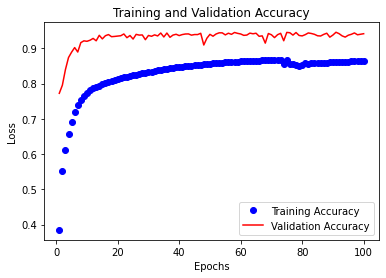

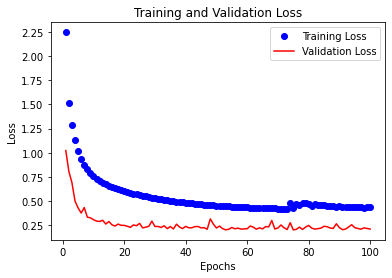

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCLS_lstmmodel32,1000x100.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://33cec862-e1e1-47f7-a23d-d9ca47d866f2/assets


INFO:tensorflow:Assets written to: ram://33cec862-e1e1-47f7-a23d-d9ca47d866f2/assets


### 64

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(Domain_data['label'].nunique(),name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 50, 50)            2550      
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0   

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=100,
          validation_split=0.1)
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/100
1460/1460 [==============================] - 19s 11ms/step - loss: 1.9326 - acc: 0.4505 - val_loss: 15.6292 - val_acc: 0.2426
Epoch 2/100
1460/1460 [==============================] - 17s 12ms/step - loss: 1.3270 - acc: 0.5982 - val_loss: 17.3625 - val_acc: 0.2828
Epoch 3/100
1460/1460 [==============================] - 16s 11ms/step - loss: 1.1270 - acc: 0.6585 - val_loss: 17.1859 - val_acc: 0.3334
Epoch 4/100
1460/1460 [==============================] - 16s 11ms/step - loss: 0.9513 - acc: 0.7173 - val_loss: 16.6491 - val_acc: 0.2571
Epoch 5/100
1460/1460 [==============================] - 17s 11ms/step - loss: 0.8289 - acc: 0.7546 - val_loss: 15.7099 - val_acc: 0.3480
Epoch 6/100
1460/1460 [==============================] - 16s 11ms/step - loss: 0.7482 - acc: 0.7759 - val_loss: 14.8592 - val_acc: 0.3322
Epoch 7/100
1460/1460 [==============================] - 16s 11ms/step - loss: 0.6934 - acc: 0.7897 - val_loss: 14.2163 - val_acc: 0.3595
Epoch 8/100
1460/1460 [===========

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12979/12979 [==============================] - 53s 4ms/step - loss: 0.3275 - acc: 0.9470
LSTM multiclass Testing finished in 82.04722476005554 milisecond!!

Accuracy on test set: [0.32749143242836, 0.9469887614250183]
Test loss: 0.32749143242836
Test accuracy: 0.9469887614250183


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12979/12979 [==============================] - 50s 4ms/step - loss: 0.3275 - acc: 0.9470
Test set
   Accuracy: 0.947


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       0.19      1.00      0.31         5
           2       0.80      1.00      0.89        28
           3       1.00      1.00      1.00     94137
           4       0.11      0.41      0.17       210
           5       0.88      0.93      0.90       197
           6       0.02      0.09      0.03        89
           7       0.00      0.00      0.00         1
           8       0.05      0.25      0.08       214
           9       0.07      0.20      0.10       151
          10       1.00      0.99      0.99       218
          11       0.98      0.99      0.99    100071
          12       0.58      0.96      0.72        94
          13       0.20      0.50      0.28        44
          14       0.85      0.94      0.89      5982
          15       0.15      0.27      0.20        51
          16       0.08      0.29      0.12        63
          17       0.99    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


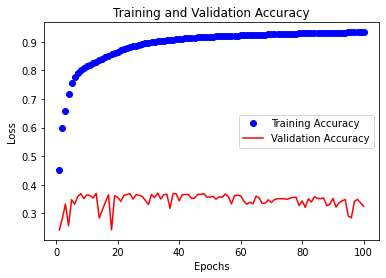

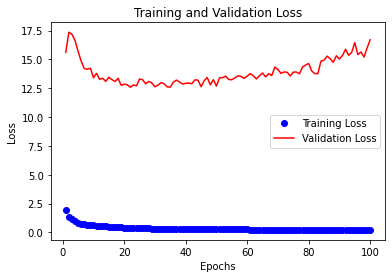

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCLS_lstmmodel64,1000x100_2nd.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://30bed36c-6003-4795-a55d-75c52d230220/assets


INFO:tensorflow:Assets written to: ram://30bed36c-6003-4795-a55d-75c52d230220/assets


### 128

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(Domain_data['label'].nunique(),name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 50, 50)            2550      
                                                                 
 lstm_3 (LSTM)               (None, 128)               91648     
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 FC1 (Dense)                 (None, 256)               33024     
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0   

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=100,
          validation_split=0.1)
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/100
1460/1460 [==============================] - 31s 20ms/step - loss: 2.3679 - acc: 0.3324 - val_loss: 13.7675 - val_acc: 0.2769
Epoch 2/100
1460/1460 [==============================] - 29s 20ms/step - loss: 1.2501 - acc: 0.6222 - val_loss: 13.7528 - val_acc: 0.3340
Epoch 3/100
1460/1460 [==============================] - 29s 20ms/step - loss: 0.9356 - acc: 0.7220 - val_loss: 14.2754 - val_acc: 0.3365
Epoch 4/100
1460/1460 [==============================] - 29s 20ms/step - loss: 0.7364 - acc: 0.7778 - val_loss: 12.9363 - val_acc: 0.3676
Epoch 5/100
1460/1460 [==============================] - 29s 20ms/step - loss: 0.6481 - acc: 0.8003 - val_loss: 13.3648 - val_acc: 0.3740
Epoch 6/100
1460/1460 [==============================] - 29s 20ms/step - loss: 0.5872 - acc: 0.8175 - val_loss: 12.5921 - val_acc: 0.3735
Epoch 7/100
1460/1460 [==============================] - 29s 20ms/step - loss: 0.5246 - acc: 0.8345 - val_loss: 13.1611 - val_acc: 0.3690
Epoch 8/100
1460/1460 [===========

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12979/12979 [==============================] - 51s 4ms/step - loss: 0.3414 - acc: 0.9583
LSTM multiclass Testing finished in 82.14248061180115 milisecond!!

Accuracy on test set: [0.3414068818092346, 0.9583364725112915]
Test loss: 0.3414068818092346
Test accuracy: 0.9583364725112915


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12979/12979 [==============================] - 51s 4ms/step - loss: 0.3414 - acc: 0.9583
Test set
   Accuracy: 0.958


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.06      1.00      0.11         5
           2       0.88      1.00      0.93        28
           3       1.00      1.00      1.00     94137
           4       0.20      0.35      0.26       210
           5       0.91      0.97      0.94       197
           6       0.02      0.06      0.02        89
           7       0.00      0.00      0.00         1
           8       0.03      0.06      0.04       214
           9       0.14      0.15      0.15       151
          10       0.97      1.00      0.98       218
          11       0.99      0.98      0.98    100071
          12       0.93      0.99      0.96        94
          13       0.39      0.45      0.42        44
          14       0.89      0.93      0.90      5982
          15       0.32      0.41      0.36        51
          16       0.08      0.11      0.09        63
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


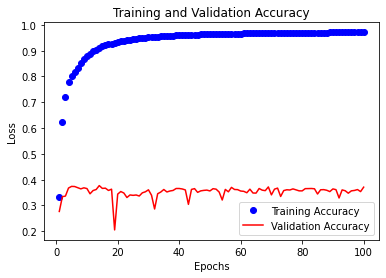

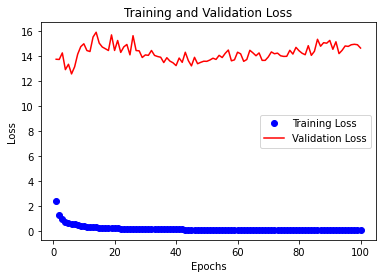

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCLS_lstmmodel128,1000x100_2nd.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://16c2ebf3-8128-4eaf-8241-685fb9327634/assets


INFO:tensorflow:Assets written to: ram://16c2ebf3-8128-4eaf-8241-685fb9327634/assets


# before

## 32x500,20

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(57,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 50)            2550      
                                                                 
 lstm_1 (LSTM)               (None, 32)                10624     
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0   

In [ ]:
history=model.fit(X_train,y_train,batch_size=500,epochs=20,
          validation_data=(X_test, y_test))
print('Training finished !!')

Epoch 1/20
3275/3275 [==============================] - 28s 9ms/step - loss: 1.2447 - acc: 0.6664 - val_loss: 1.0598 - val_acc: 0.7072
Epoch 2/20
3275/3275 [==============================] - 25s 8ms/step - loss: 0.7824 - acc: 0.7789 - val_loss: 0.5932 - val_acc: 0.8375
Epoch 3/20
3275/3275 [==============================] - 25s 8ms/step - loss: 0.6246 - acc: 0.8265 - val_loss: 0.5434 - val_acc: 0.8450
Epoch 4/20
3275/3275 [==============================] - 28s 9ms/step - loss: 0.5419 - acc: 0.8502 - val_loss: 0.4865 - val_acc: 0.8618
Epoch 5/20
3275/3275 [==============================] - 26s 8ms/step - loss: 0.4991 - acc: 0.8619 - val_loss: 0.4275 - val_acc: 0.8794
Epoch 6/20
3275/3275 [==============================] - 25s 8ms/step - loss: 0.4724 - acc: 0.8699 - val_loss: 0.4075 - val_acc: 0.8847
Epoch 7/20
3275/3275 [==============================] - 25s 8ms/step - loss: 0.4522 - acc: 0.8749 - val_loss: 0.4776 - val_acc: 0.8643
Epoch 8/20
3275/3275 [==============================] -

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCLS_lstmmodel32,500x20.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://b8e51001-174f-461e-9c1a-0c934dd8f2ba/assets


INFO:tensorflow:Assets written to: ram://b8e51001-174f-461e-9c1a-0c934dd8f2ba/assets


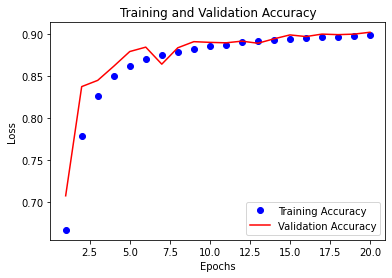

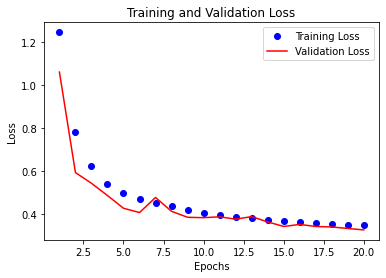

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12791/12791 [==============================] - 48s 4ms/step - loss: 0.3269 - acc: 0.9025
Test set
   Accuracy: 0.902


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2120
           1       1.00      1.00      1.00      2126
           2       0.97      1.00      0.99      2119
           3       1.00      1.00      1.00     94155
           4       0.64      0.06      0.11      2038
           5       1.00      1.00      1.00      2066
           6       1.00      1.00      1.00      2075
           7       0.97      0.99      0.98      2018
           8       0.00      0.00      0.00      2060
           9       1.00      1.00      1.00      2025
          10       0.51      0.02      0.03      2278
          11       0.87      0.15      0.26      2075
          12       0.95      1.00      0.98      2064
          13       0.97      1.00      0.99     74784
          14       0.98      1.00      0.99      2005
          15       0.79      0.70      0.74      2014
          16       0.77      0.98      0.86      5902
          17       0.88    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


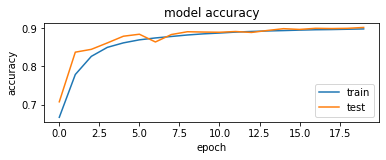

In [ ]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

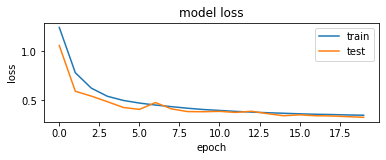

In [ ]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

## 32x1000,50

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(57,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 50, 50)            2550      
                                                                 
 lstm_6 (LSTM)               (None, 32)                10624     
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0   

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=50,
          validation_data=(X_test, y_test))
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/50
1638/1638 [==============================] - 16s 10ms/step - loss: 0.5401 - acc: 0.8522 - val_loss: 0.4596 - val_acc: 0.8719
Epoch 2/50
1638/1638 [==============================] - 14s 9ms/step - loss: 0.5121 - acc: 0.8597 - val_loss: 0.4859 - val_acc: 0.8678
Epoch 3/50
1638/1638 [==============================] - 16s 10ms/step - loss: 0.4905 - acc: 0.8656 - val_loss: 0.4225 - val_acc: 0.8810
Epoch 4/50
1638/1638 [==============================] - 15s 9ms/step - loss: 0.4718 - acc: 0.8703 - val_loss: 0.4433 - val_acc: 0.8753
Epoch 5/50
1638/1638 [==============================] - 16s 10ms/step - loss: 0.4550 - acc: 0.8744 - val_loss: 0.4143 - val_acc: 0.8799
Epoch 6/50
1638/1638 [==============================] - 21s 13ms/step - loss: 0.4399 - acc: 0.8781 - val_loss: 0.3833 - val_acc: 0.8911
Epoch 7/50
1638/1638 [==============================] - 20s 12ms/step - loss: 0.4263 - acc: 0.8812 - val_loss: 0.3785 - val_acc: 0.8916
Epoch 8/50
1638/1638 [============================

TypeError: ignored

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12791/12791 [==============================] - 51s 4ms/step - loss: 0.2828 - acc: 0.9153
LSTM multiclass Testing finished in 82.1181321144104 milisecond!!

Accuracy on test set: [0.28276142477989197, 0.9153400659561157]
Test loss: 0.28276142477989197
Test accuracy: 0.9153400659561157


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12791/12791 [==============================] - 49s 4ms/step - loss: 0.2828 - acc: 0.9153
Test set
   Accuracy: 0.915


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2120
           1       1.00      1.00      1.00      2126
           2       0.97      1.00      0.99      2119
           3       1.00      1.00      1.00     94155
           4       0.64      0.06      0.11      2038
           5       1.00      1.00      1.00      2066
           6       1.00      1.00      1.00      2075
           7       0.97      0.99      0.98      2018
           8       0.00      0.00      0.00      2060
           9       1.00      1.00      1.00      2025
          10       0.51      0.02      0.03      2278
          11       0.87      0.15      0.26      2075
          12       0.95      1.00      0.98      2064
          13       0.97      1.00      0.99     74784
          14       0.98      1.00      0.99      2005
          15       0.79      0.70      0.74      2014
          16       0.77      0.98      0.86      5902
          17       0.88    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


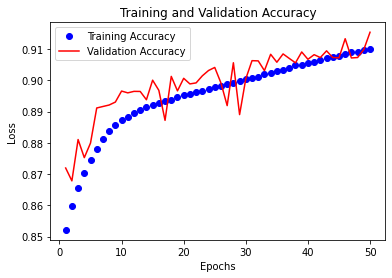

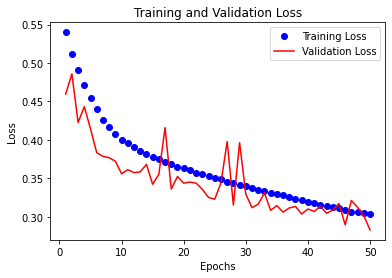

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

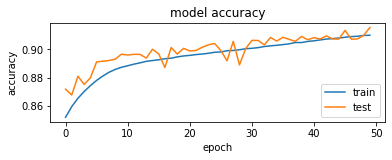

In [ ]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

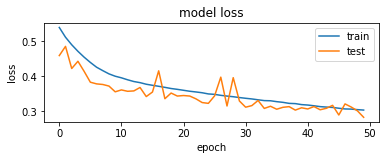

In [ ]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

## 64,1000x50

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(57,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            2550      
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=50,
          validation_data=(X_test, y_test))
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/50
1638/1638 [==============================] - 27s 13ms/step - loss: 1.5645 - acc: 0.5666 - val_loss: 1.1197 - val_acc: 0.6820
Epoch 2/50
1638/1638 [==============================] - 19s 12ms/step - loss: 0.9979 - acc: 0.7161 - val_loss: 0.8652 - val_acc: 0.7613
Epoch 3/50
1638/1638 [==============================] - 20s 12ms/step - loss: 0.7791 - acc: 0.7803 - val_loss: 0.6656 - val_acc: 0.8243
Epoch 4/50
1638/1638 [==============================] - 20s 12ms/step - loss: 0.6400 - acc: 0.8246 - val_loss: 0.5072 - val_acc: 0.8578
Epoch 5/50
1638/1638 [==============================] - 20s 12ms/step - loss: 0.5498 - acc: 0.8492 - val_loss: 0.4777 - val_acc: 0.8669
Epoch 6/50
1638/1638 [==============================] - 20s 12ms/step - loss: 0.4877 - acc: 0.8658 - val_loss: 0.4390 - val_acc: 0.8735
Epoch 7/50
1638/1638 [==============================] - 20s 12ms/step - loss: 0.4471 - acc: 0.8762 - val_loss: 0.3810 - val_acc: 0.8910
Epoch 8/50
1638/1638 [==========================

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12791/12791 [==============================] - 63s 5ms/step - loss: 0.1838 - acc: 0.9453
LSTM multiclass Testing finished in 82.12185955047607 milisecond!!

Accuracy on test set: [0.18376906216144562, 0.9452710151672363]
Test loss: 0.18376906216144562
Test accuracy: 0.9452710151672363


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12791/12791 [==============================] - 49s 4ms/step - loss: 0.1838 - acc: 0.9453
Test set
   Accuracy: 0.945


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2075
           1       1.00      1.00      1.00      2096
           2       1.00      1.00      1.00      2038
           3       1.00      1.00      1.00     93605
           4       0.72      0.49      0.58      2044
           5       1.00      1.00      1.00      2036
           6       1.00      1.00      1.00      2029
           7       0.99      1.00      0.99      2063
           8       0.75      0.31      0.44      2111
           9       1.00      1.00      1.00      2011
          10       0.51      0.05      0.09      2235
          11       0.87      0.30      0.45      2083
          12       1.00      1.00      1.00      2107
          13       0.98      1.00      0.99     74830
          14       0.99      1.00      1.00      2075
          15       0.97      0.98      0.97      2092
          16       0.78      0.97      0.86      6084
          17       0.89    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


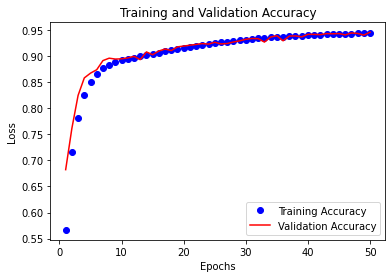

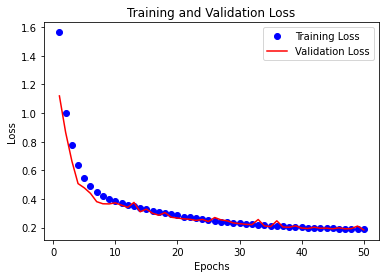

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCLS_lstmmodel64,1000x50.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://3ae25cdd-4cca-4188-b753-d13f910754a2/assets


INFO:tensorflow:Assets written to: ram://3ae25cdd-4cca-4188-b753-d13f910754a2/assets


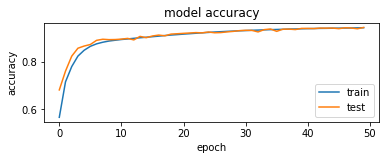

In [ ]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

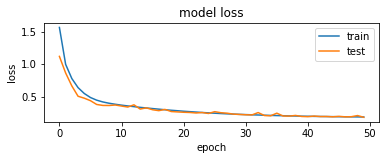

In [ ]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

## 64,1000x100

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(57,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 50)            2550      
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0   

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=100,
          validation_data=(X_test, y_test))
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/100
1638/1638 [==============================] - 23s 12ms/step - loss: 1.5795 - acc: 0.5610 - val_loss: 1.0225 - val_acc: 0.6975
Epoch 2/100
1638/1638 [==============================] - 20s 12ms/step - loss: 1.0094 - acc: 0.7155 - val_loss: 0.7933 - val_acc: 0.7634
Epoch 3/100
1638/1638 [==============================] - 20s 12ms/step - loss: 0.8064 - acc: 0.7717 - val_loss: 0.8172 - val_acc: 0.7991
Epoch 4/100
1638/1638 [==============================] - 20s 12ms/step - loss: 0.6616 - acc: 0.8185 - val_loss: 0.5706 - val_acc: 0.8425
Epoch 5/100
1638/1638 [==============================] - 20s 12ms/step - loss: 0.5699 - acc: 0.8442 - val_loss: 0.4823 - val_acc: 0.8621
Epoch 6/100
1638/1638 [==============================] - 20s 12ms/step - loss: 0.5174 - acc: 0.8583 - val_loss: 0.4482 - val_acc: 0.8741
Epoch 7/100
1638/1638 [==============================] - 20s 12ms/step - loss: 0.4806 - acc: 0.8666 - val_loss: 0.5302 - val_acc: 0.8628
Epoch 8/100
1638/1638 [==================

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12791/12791 [==============================] - 54s 4ms/step - loss: 0.1698 - acc: 0.9524
LSTM multiclass Testing finished in 82.12053942680359 milisecond!!

Accuracy on test set: [0.16977764666080475, 0.9523805975914001]
Test loss: 0.16977764666080475
Test accuracy: 0.9523805975914001


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12791/12791 [==============================] - 49s 4ms/step - loss: 0.1698 - acc: 0.9524
Test set
   Accuracy: 0.952


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2075
           1       1.00      1.00      1.00      2096
           2       1.00      1.00      1.00      2038
           3       1.00      1.00      1.00     93605
           4       0.83      0.64      0.72      2044
           5       1.00      1.00      1.00      2036
           6       1.00      1.00      1.00      2029
           7       0.99      0.99      0.99      2063
           8       0.77      0.67      0.72      2111
           9       1.00      1.00      1.00      2011
          10       0.55      0.08      0.13      2235
          11       0.85      0.40      0.55      2083
          12       1.00      1.00      1.00      2107
          13       0.98      1.00      0.99     74830
          14       1.00      1.00      1.00      2075
          15       0.99      0.99      0.99      2092
          16       0.78      0.96      0.86      6084
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


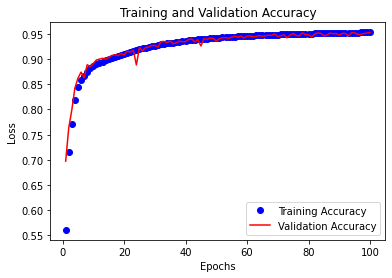

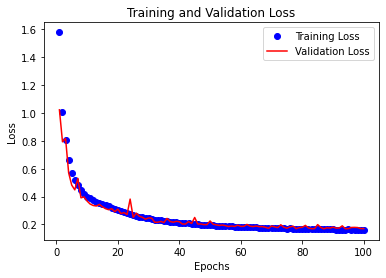

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCLS_lstmmodel64,1000x100.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://c8256ea2-ddd3-4adb-81ad-2bb27c444bd5/assets


INFO:tensorflow:Assets written to: ram://c8256ea2-ddd3-4adb-81ad-2bb27c444bd5/assets


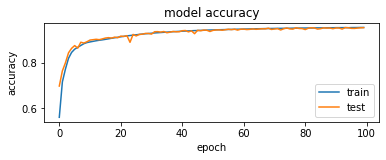

In [ ]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

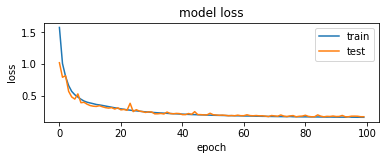

In [ ]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

## 128,1000x100

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(57,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            2550      
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 FC1 (Dense)                 (None, 256)               33024     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=100,
          validation_data=(X_test, y_test))
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/100
1638/1638 [==============================] - 40s 20ms/step - loss: 1.5246 - acc: 0.5734 - val_loss: 1.2356 - val_acc: 0.6578
Epoch 2/100
1638/1638 [==============================] - 33s 20ms/step - loss: 0.8549 - acc: 0.7591 - val_loss: 0.8782 - val_acc: 0.7387
Epoch 3/100
1638/1638 [==============================] - 34s 21ms/step - loss: 0.6090 - acc: 0.8350 - val_loss: 0.4926 - val_acc: 0.8639
Epoch 4/100
1638/1638 [==============================] - 34s 21ms/step - loss: 0.4942 - acc: 0.8654 - val_loss: 0.4158 - val_acc: 0.8827
Epoch 5/100
1638/1638 [==============================] - 34s 21ms/step - loss: 0.4381 - acc: 0.8784 - val_loss: 0.3916 - val_acc: 0.8879
Epoch 6/100
1638/1638 [==============================] - 36s 22ms/step - loss: 0.3945 - acc: 0.8884 - val_loss: 0.4032 - val_acc: 0.8837
Epoch 7/100
1638/1638 [==============================] - 34s 21ms/step - loss: 0.3690 - acc: 0.8945 - val_loss: 0.4095 - val_acc: 0.8909
Epoch 8/100
1638/1638 [==================

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12791/12791 [==============================] - 53s 4ms/step - loss: 0.1539 - acc: 0.9651
LSTM multiclass Testing finished in 82.11748886108398 milisecond!!

Accuracy on test set: [0.15387646853923798, 0.9650629758834839]
Test loss: 0.15387646853923798
Test accuracy: 0.9650629758834839


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12791/12791 [==============================] - 50s 4ms/step - loss: 0.1539 - acc: 0.9651
Test set
   Accuracy: 0.965


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2046
           1       1.00      1.00      1.00      2103
           2       1.00      1.00      1.00      2096
           3       1.00      1.00      1.00     93589
           4       0.95      0.97      0.96      2068
           5       1.00      1.00      1.00      2106
           6       1.00      1.00      1.00      2062
           7       0.99      0.99      0.99      1988
           8       0.93      0.99      0.96      2091
           9       1.00      1.00      1.00      2040
          10       0.87      0.92      0.89      2146
          11       0.83      0.92      0.87      2078
          12       1.00      1.00      1.00      2040
          13       0.97      0.98      0.98     74788
          14       1.00      1.00      1.00      1943
          15       0.99      1.00      0.99      2088
          16       0.74      0.94      0.83      6141
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


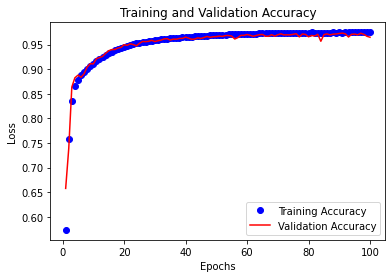

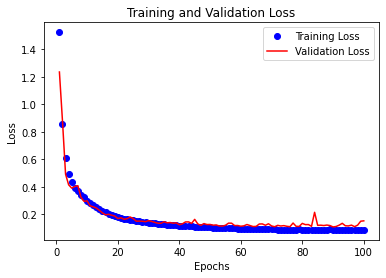

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCLS_lstmmodel128,1000x100.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://133eec74-559d-4b96-81b4-732c1d4a3b3f/assets


INFO:tensorflow:Assets written to: ram://133eec74-559d-4b96-81b4-732c1d4a3b3f/assets


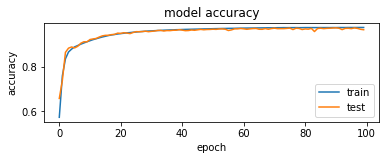

In [ ]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

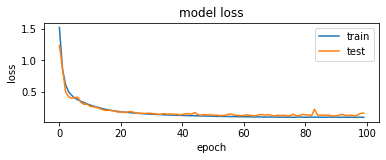

In [ ]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')